# Python 실습 2 (2023.09.27)
### 빅데이터수치해석 입문 및 실습 
### 숙명여자대학교 기계시스템학부 심주용

- Reference

[Data-Driven Science and Engineering](https://www.databookuw.com/) by Steven L. Brunton, J. Nathan Kutz

#  Rank-r Approximation of an image

We will decompose a matrix $X$ using SVD and then reconstructs and visualizes approximate versions of $X$ using different rank values.

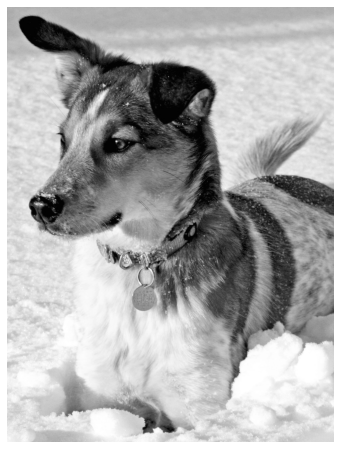

In [2]:
from matplotlib.image import imread
import matplotlib.pyplot as plt
import numpy as np
import os
plt.rcParams['figure.figsize'] = [16, 8]

from urllib.request import urlretrieve

urlretrieve('https://github.com/jooyongsim/numerical2023/blob/main/src/dog.jpg?raw=true','dog.jpg')

A = imread(os.path.join('dog.jpg'))
X = np.mean(A, -1); # Convert RGB to grayscale

img = plt.imshow(X)
img.set_cmap('gray')
plt.axis('off')
plt.show()

Let's perform Singular Value Decomposition on a matrix $X$ using NumPy's linalg.svd() method. The matrix $X$ is decomposed into three matrices: $U$, $S$, and $V^T$. The full_matrices=False argument ensures that the shapes of $U$, $S$, and $V^T$ are aligned for the multiplication operations that follow (i.e., producing a reduced rank approximation of $X$). After the decomposition, $S$ is a 1-dimensional array containing the singular values. The line S = np.diag(S) transforms this array into a diagonal matrix.

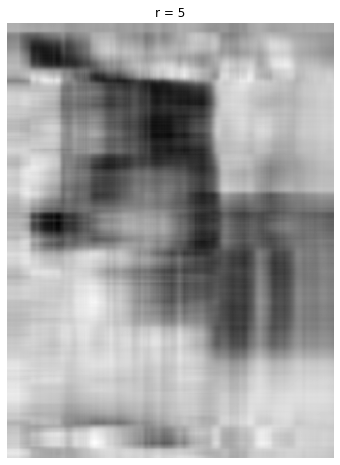

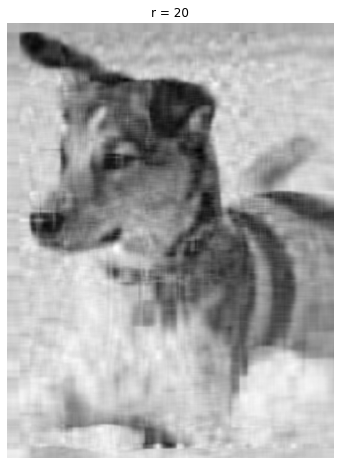

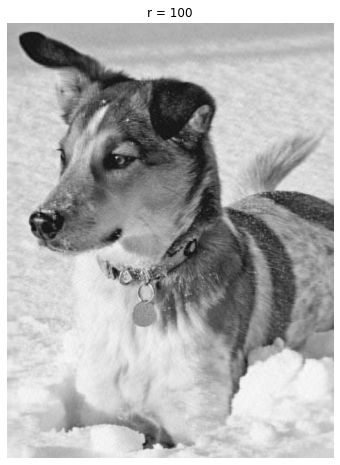

In [3]:
U, S, VT = np.linalg.svd(X,full_matrices=False)
S = np.diag(S)

j = 0
for r in (5, 20, 100):
    # Construct approximate image
    Xapprox = U[:,:r] @ S[0:r,:r] @ VT[:r,:]
    plt.figure(j+1)
    j += 1
    img = plt.imshow(Xapprox)
    img.set_cmap('gray')
    plt.axis('off')
    plt.title('r = ' + str(r))
    plt.show()

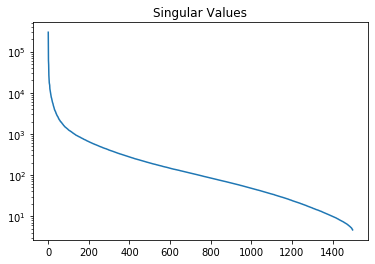

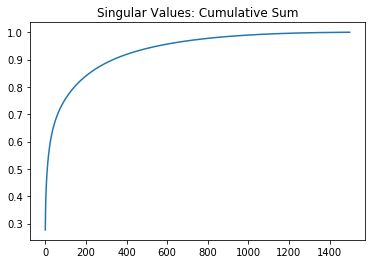

In [3]:
## f_ch01_ex02_2

plt.figure(1)
plt.semilogy(np.diag(S))
plt.title('Singular Values')
plt.show()

plt.figure(2)
plt.plot(np.cumsum(np.diag(S))/np.sum(np.diag(S)))
plt.title('Singular Values: Cumulative Sum')
plt.show()